In [32]:
import numpy as np
from matplotlib import pyplot as plt
%load_ext autoreload
%autoreload 2
import dice_battle as dice
import print_dice 
np.set_printoptions(suppress=True)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [175]:
print_dice.print_dice_rolls([1,2,3,4,5,6])

+-----+  +-----+  +-----+  +-----+  +-----+  +-----+  
|     |  | o   |  | o   |  | o o |  | o o |  | o o |  
|  o  |  |     |  |  o  |  |     |  |  o  |  | o o |  
|     |  |   o |  |   o |  | o o |  | o o |  | o o |  
+-----+  +-----+  +-----+  +-----+  +-----+  +-----+  


In [115]:
P = dice.probabilities(5)

In [117]:
P[5]

array([0.59812243, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.0001286 ,
       0.000643  , 0.00192901, 0.00450103, 0.00900206, 0.0155607 ,
       0.02379115, 0.03279321, 0.04115226, 0.0469393 , 0.04899691,
       0.0469393 , 0.04115226, 0.03279321, 0.02379115, 0.0155607 ,
       0.00900206, 0.00450103, 0.00192901, 0.000643  , 0.0001286 ])

In [108]:
P = dice.probabilities(5)
N = 50
D = 5
dice.optimal_strategy_iter(D,P,N)[1]

array([[5, 5, 5, ..., 5, 5, 1],
       [5, 5, 5, ..., 5, 5, 1],
       [4, 5, 5, ..., 5, 5, 1],
       ...,
       [4, 4, 1, ..., 4, 1, 2],
       [4, 4, 4, ..., 1, 4, 1],
       [4, 4, 4, ..., 4, 4, 4]])

In [105]:
P.shape


(6, 30)

In [165]:
N, r = dice.expected_rewards(blind_strategy,random_strategy,1000,300)

In [51]:
D = 10
N = 100
P = dice.probabilities(D)
E, d_opt = dice.optimal_strategy_iter1(D,P,N)

In [110]:
N2, r2 = expected_rewards(blind_strategy,optimal_strategy,1000,300,10)


In [90]:
N = np.arange(0,200,5)+10
D = 10
P = dice.probabilities(D)
N1, r1 = dice.expected_rewards(dice.optimal_strategy,dice.blind_strategy,1000,N,D,P)
_, r2 = dice.expected_rewards(dice.blind_strategy,dice.optimal_strategy,1000,N,D,P)

In [135]:
N = np.arange(0,200,5)+10
D = 10
P = dice.probabilities(D)
N1_b, r1_b = dice.expected_rewards(dice.optimal_strategy,dice.blind_strategy,1000,N,D,P)
_, r2_b = dice.expected_rewards(dice.blind_strategy,dice.optimal_strategy,1000,N,D,P)

In [92]:
N1, r1 = dice.expected_rewards(dice.optimal_strategy,dice.random_strategy,1000,N,D,P)
_, r2 = dice.expected_rewards(dice.random_strategy,dice.optimal_strategy,1000,N,D,P)

In [133]:
N1_a, r1_a = dice.expected_rewards(dice.optimal_strategy,dice.random_strategy,1000,N,D,P)
_, r2_a = dice.expected_rewards(dice.random_strategy,dice.optimal_strategy,1000,N,D,P)

In [138]:
N = np.arange(0,200,5)+10
D = 10
P = dice.probabilities(D)
N1_c, r1_c = dice.expected_rewards(dice.optimal_strategy,dice.optimal_strategy,1000,N,D,P)

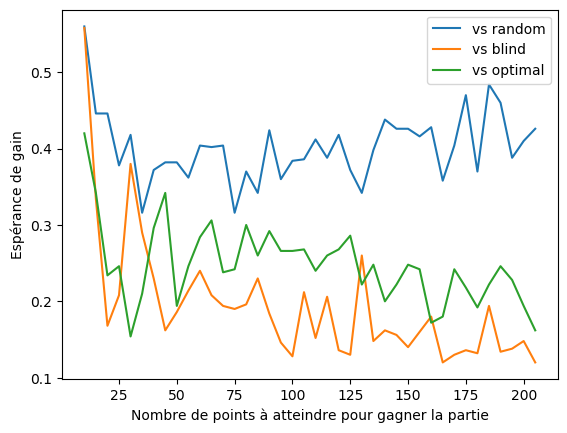

In [174]:
# lorsqu'il entame la partie et D fixé à 10
plt.rcdefaults()
fig, ax = plt.subplots()
ax.plot(N1, r1, label='vs random')
ax.plot(N1_b,r1_b, label='vs blind')
ax.plot(N1_c,r1_c, label='vs optimal')
ax.set_xlabel('Nombre de points à atteindre pour gagner la partie')
ax.set_ylabel('Espérance de gain')
plt.legend()
fig.savefig('expected_rewards_opt_1.jpg')

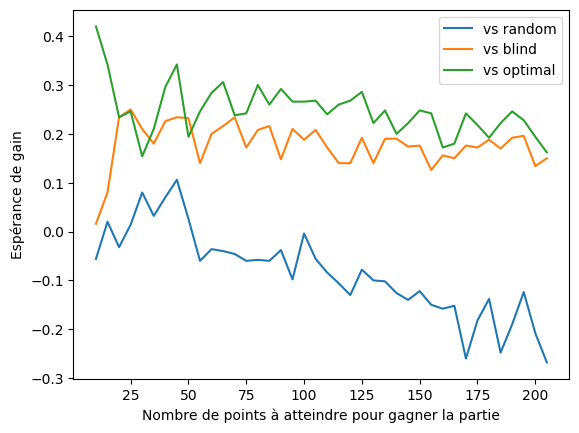

In [175]:
# lorsqu'il n'entame pas la partie et D fixé a 10
plt.rcdefaults()
fig, ax = plt.subplots()
ax.plot(N1, r2_a, label='vs random')
ax.plot(N1_b,r2_b, label='vs blind')
ax.plot(N1_c,r1_c, label='vs optimal')
ax.set_xlabel('Nombre de points à atteindre pour gagner la partie')
ax.set_ylabel('Espérance de gain')
plt.legend()
fig.savefig('expected_rewards_opt_2.jpg')

In [168]:
def expected_rewards_D(strategy1, strategy2, nb_games, N, list_D,): # TODO: ajouter la possibilité de faire varier D
    """
    Méthode permettant de calculer l'esperance de gain pour le joueur 1 en simulant plusieurs parties
    ----------------------------------------------------
    Args:
        - strategy1 : stratégie du joueur 1
        - strategy2 : stratégie du joueur 2
        - nb_games : nombre de parties à simuler
        - list_N : liste des valeurs de N considérées
        - D : nombre maximum de dés
        - P : Tableau de probabilités
    """
    rewards = np.zeros(len(list_D))
    opt = False
    d_opt = None
    if(strategy1 == dice.optimal_strategy or strategy2 == dice.optimal_strategy):
        opt = True
    for i in range(len(list_D)):
        P = dice.probabilities(list_D[i])
        if opt:
            d_opt = dice.optimal_strategy_iter(list_D[i],P,N)[1]
        for _ in range(nb_games):
            win = dice.play(strategy1,strategy2,d_opt,win_score = N,number_dice = list_D[i],verbose=False)
            if win == 1:
                rewards[i] += 1
            else:
                rewards[i] += -1
        rewards[i] = rewards[i]/nb_games
    return list_D, rewards

In [177]:
list_D = np.arange(4,25,1)
N = 100
D, rd  = expected_rewards_D(dice.optimal_strategy,dice.optimal_strategy,1000,N,list_D)


In [178]:
D, rd_b  = expected_rewards_D(dice.optimal_strategy,dice.blind_strategy,1000,N,list_D)

In [179]:
D, rd_r  = expected_rewards_D(dice.optimal_strategy,dice.random_strategy,1000,N,list_D)

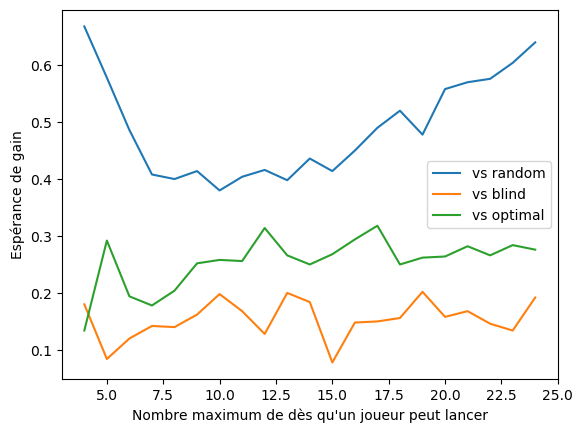

In [180]:
# N fixé à 100
plt.rcdefaults()
fig, ax = plt.subplots()
ax.plot(D, rd_r, label='vs random')
ax.plot(D,rd_b, label='vs blind')
ax.plot(D,rd, label='vs optimal')
ax.set_xlabel("Nombre maximum de dès qu'un joueur peut lancer")
ax.set_ylabel('Espérance de gain')
plt.legend()
fig.savefig('expected_rewards_opt_D_1.jpg')

In [223]:
from scipy.optimize import linprog
A = [[0,-2,1,1],[2,0,-2,1],[-1,2,0,-2],[-1,-1,2,0]]
c = [0,0,0,0]
b = [0,0,0,0]
A_eq = [[1,1,1,1]]
b_eq = [1]


In [224]:
res = linprog(c, A_ub=A, b_ub=b,A_eq = A_eq, b_eq=b_eq)

In [225]:
res.x

array([0. , 0.4, 0.2, 0.4])

In [211]:
G = dice.matrice_gain(10)

In [222]:

v= dice.get_probas(G)
v

array([0.        , 0.        , 0.13347002, 0.03514862, 0.        ,
       0.        , 0.83138135, 0.        , 0.        , 0.        ])

In [227]:
dice.generate_d(v,10)

7